In [1]:
import sklearn
print('sklearn version: ', sklearn.__version__)

import seaborn
print('seaborn version: ', seaborn.__version__)

import pandas
print('pandas version: ', pandas.__version__)

from tensorflow import keras
print('Keras version: ', keras.__version__)

import tensorflow
print('Tensorflow version: ', tensorflow.__version__)

sklearn version:  1.2.2
seaborn version:  0.12.2
pandas version:  1.5.3
Keras version:  2.11.0
Tensorflow version:  2.11.1


In [2]:
# (1) formulate the problem

In [3]:
import pandas as pd

In [4]:
ds = pd.read_csv('/Users/lucykilloran/Clones/dl_workshop/subset_ceramics_v30032023.csv')

In [5]:
ds.head()

,find_number,material,start_date,end_date,l2_class,object_diameter,object_height,ceramics_image_type,ceramics_mark,on_website,material_simplified,url
0,NZR2.00257CER066,industrial ware: white,1775,1850,Consumption: drinking,95.0,55.0,NaN,NaN,0,industrial ware,NaN
1,NZR2.00514CER247,faience: Holland,1750,1825,Consumption: drinking,95.0,60.0,NaN,NaN,0,faience,NaN
2,NZR2.00520CER080,porcelain: Europe,1850,1900,Consumption: drinking,90.0,55.0,NaN,NaN,0,porcelain,NaN
3,NZR2.00523CER081,porcelain: Europe,1825,1875,Consumption: drinking,115.0,25.0,NaN,NaN,0,porcelain,NaN
4,NZR2.00575CER040,porcelain: Europe,1775,1825,Consumption: drinking,130.0,30.0,NaN,NaN,0,porcelain,NaN


In [6]:
ds.describe()

,start_date,end_date,object_diameter,object_height,on_website
count,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,1734.816716,1793.851906,195.017009,45.094135,0.222287
std,109.935124,105.334715,88.568140,33.193420,0.415844
min,1200.000000,1350.000000,30.000000,10.000000,0.000000
25%,1675.000000,1750.000000,130.000000,25.000000,0.000000
50%,1760.000000,1825.000000,190.000000,35.000000,0.000000
75%,1800.000000,1875.000000,250.000000,55.000000,0.000000
max,1980.000000,2005.000000,620.000000,290.000000,1.000000


In [7]:
ds.isna()

,find_number,material,start_date,end_date,l2_class,object_diameter,object_height,ceramics_image_type,ceramics_mark,on_website,material_simplified,url
0,False,False,False,False,False,False,False,True,True,False,False,True
1,False,False,False,False,False,False,False,True,True,False,False,True
2,False,False,False,False,False,False,False,True,True,False,False,True
3,False,False,False,False,False,False,False,True,True,False,False,True
4,False,False,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3405,False,False,False,False,False,False,False,False,True,False,False,False
3406,False,False,False,False,False,False,False,False,True,False,False,False
3407,False,False,False,False,False,False,False,False,True,False,False,False
3408,False,False,False,False,False,False,False,False,True,False,False,False


In [8]:
ds.shape

(3410, 12)

In [9]:
ds['ceramics_image_type'].unique()

array([nan, 'floral motif', 'chinese decor', 'text/inscriptions',
       'still lifes/objects', 'geometric patterns',
       'religious/biblical images', 'landscape', 'human figure',
       'mixture', 'animal scenery', 'genre scene', 'ornamental',
       'marbled', 'Coat of arms/heraldry', 'seascape'], dtype=object)

In [10]:
ds.columns

Index(['find_number', 'material', 'start_date', 'end_date', 'l2_class',
       'object_diameter', 'object_height', 'ceramics_image_type',
       'ceramics_mark', 'on_website', 'material_simplified', 'url'],
      dtype='object')

In [11]:
# (2) identify our inputs and outputs

In [12]:
ds.isna().sum()

find_number               0
material                  0
start_date                0
end_date                  0
l2_class                  0
object_diameter           0
object_height             0
ceramics_image_type    2413
ceramics_mark          3308
on_website                0
material_simplified       0
url                    2652
dtype: int64

In [13]:
# (3) prepare the data

In [14]:
ds_preprocessed = ds[['l2_class', 'object_diameter', 'object_height', 'material_simplified']]

In [15]:
ds_preprocessed

,l2_class,object_diameter,object_height,material_simplified
0,Consumption: drinking,95.0,55.0,industrial ware
1,Consumption: drinking,95.0,60.0,faience
2,Consumption: drinking,90.0,55.0,porcelain
3,Consumption: drinking,115.0,25.0,porcelain
4,Consumption: drinking,130.0,30.0,porcelain
...,...,...,...,...
3405,"Food consumption: plate, dish, bowl",180.0,55.0,whiteware
3406,"Food consumption: plate, dish, bowl",330.0,60.0,whiteware
3407,Consumption of food and drinks: table accessories,61.0,85.0,whiteware
3408,"Food consumption: plate, dish, bowl",180.0,38.0,whiteware


In [16]:
ds_preprocessed.isna().sum()

l2_class               0
object_diameter        0
object_height          0
material_simplified    0
dtype: int64

In [17]:
ds_preprocessed.dropna()

,l2_class,object_diameter,object_height,material_simplified
0,Consumption: drinking,95.0,55.0,industrial ware
1,Consumption: drinking,95.0,60.0,faience
2,Consumption: drinking,90.0,55.0,porcelain
3,Consumption: drinking,115.0,25.0,porcelain
4,Consumption: drinking,130.0,30.0,porcelain
...,...,...,...,...
3405,"Food consumption: plate, dish, bowl",180.0,55.0,whiteware
3406,"Food consumption: plate, dish, bowl",330.0,60.0,whiteware
3407,Consumption of food and drinks: table accessories,61.0,85.0,whiteware
3408,"Food consumption: plate, dish, bowl",180.0,38.0,whiteware


In [18]:
ds_preprocessed['l2_class'].value_counts()

Food consumption: plate, dish, bowl                               2144
Consumption: drinking                                              874
Food preparation: cooking - and hearth utensils                    255
Food preparation and consumption: various parts of kitchenware     107
Consumption of food and drinks: table accessories                   24
Consumption of tobacco and stimulants                                4
Food consumption: cutlery and tools                                  2
Name: l2_class, dtype: int64

In [19]:
# remove all rows whether plate/dish/bowl or drinking

ds_preprocessed = ds_preprocessed.query("l2_class == ['Consumption: drinking', 'Food consumption: plate, dish, bowl']")

In [20]:
ds_preprocessed

,l2_class,object_diameter,object_height,material_simplified
0,Consumption: drinking,95.0,55.0,industrial ware
1,Consumption: drinking,95.0,60.0,faience
2,Consumption: drinking,90.0,55.0,porcelain
3,Consumption: drinking,115.0,25.0,porcelain
4,Consumption: drinking,130.0,30.0,porcelain
...,...,...,...,...
3402,"Food consumption: plate, dish, bowl",260.0,52.0,whiteware
3403,"Food consumption: plate, dish, bowl",160.0,45.0,whiteware
3405,"Food consumption: plate, dish, bowl",180.0,55.0,whiteware
3406,"Food consumption: plate, dish, bowl",330.0,60.0,whiteware


In [21]:
ds_preprocessed['l2_class'] = ds_preprocessed['l2_class'].astype('category')

/var/folders/8_/rzvlrm5s6153775_gkg1m2k00000gn/T/ipykernel_5614/874918385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_preprocessed['l2_class'] = ds_preprocessed['l2_class'].astype('category')


In [22]:
ds_preprocessed['l2_class']

0                     Consumption: drinking
1                     Consumption: drinking
2                     Consumption: drinking
3                     Consumption: drinking
4                     Consumption: drinking
                       ...                 
3402    Food consumption: plate, dish, bowl
3403    Food consumption: plate, dish, bowl
3405    Food consumption: plate, dish, bowl
3406    Food consumption: plate, dish, bowl
3408    Food consumption: plate, dish, bowl
Name: l2_class, Length: 3018, dtype: category
Categories (2, object): ['Consumption: drinking', 'Food consumption: plate, dish, bowl']

In [23]:
target = pd.get_dummies(ds_preprocessed['l2_class'])
target.head()

,Consumption: drinking,"Food consumption: plate, dish, bowl"
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


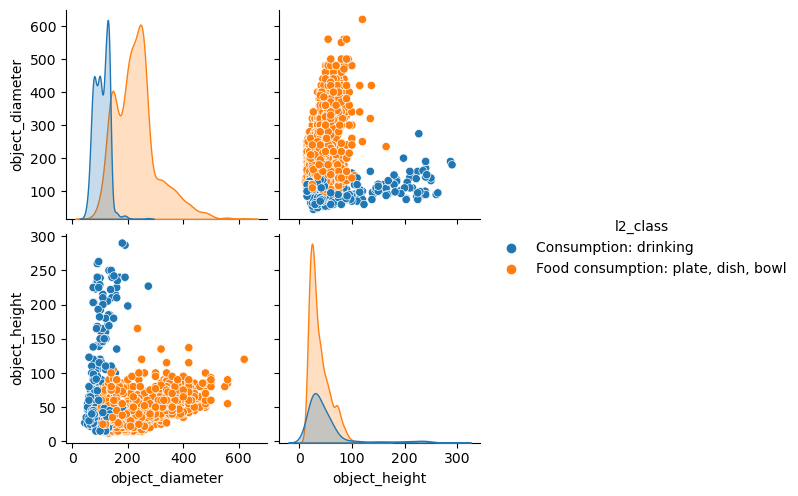

In [24]:
import seaborn as sns
sns.pairplot(ds_preprocessed, hue = 'l2_class')

In [25]:
ds_preprocessed['material_simplified'].unique()

array(['industrial ware', 'faience', 'porcelain', 'redware', 'maiolica',
       'stoneware', 'whiteware', 'gold lustre'], dtype=object)

In [26]:
ds_preprocessed['material_categorised'] = ds_preprocessed['material_simplified'].astype('category')

/var/folders/8_/rzvlrm5s6153775_gkg1m2k00000gn/T/ipykernel_5614/1505918470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_preprocessed['material_categorised'] = ds_preprocessed['material_simplified'].astype('category')


In [27]:
ds_features = pd.get_dummies(ds_preprocessed['material_categorised'])

In [28]:
ds_features

,faience,gold lustre,industrial ware,maiolica,porcelain,redware,stoneware,whiteware
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
3402,0,0,0,0,0,0,0,1
3403,0,0,0,0,0,0,0,1
3405,0,0,0,0,0,0,0,1
3406,0,0,0,0,0,0,0,1


In [29]:
ds_features = ds_features.join(ds_preprocessed.drop(columns=['l2_class', 'material_simplified', 'material_categorised']))
ds_features

,faience,gold lustre,industrial ware,maiolica,porcelain,redware,stoneware,whiteware,object_diameter,object_height
0,0,0,1,0,0,0,0,0,95.0,55.0
1,1,0,0,0,0,0,0,0,95.0,60.0
2,0,0,0,0,1,0,0,0,90.0,55.0
3,0,0,0,0,1,0,0,0,115.0,25.0
4,0,0,0,0,1,0,0,0,130.0,30.0
...,...,...,...,...,...,...,...,...,...,...
3402,0,0,0,0,0,0,0,1,260.0,52.0
3403,0,0,0,0,0,0,0,1,160.0,45.0
3405,0,0,0,0,0,0,0,1,180.0,55.0
3406,0,0,0,0,0,0,0,1,330.0,60.0


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ds_features, target, test_size=0.2, random_state=0, shuffle=True, stratify=target)

In [31]:
len(X_train)

2414

In [32]:
len(X_test)

604

In [33]:
X_train.shape

(2414, 10)

In [34]:
X_train.describe()

,faience,gold lustre,industrial ware,maiolica,porcelain,redware,stoneware,whiteware,object_diameter,object_height
count,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000,2414.000000
mean,0.036454,0.000829,0.456918,0.019470,0.232809,0.210439,0.025269,0.017813,193.801988,42.053438
std,0.187456,0.028778,0.498244,0.138198,0.422709,0.407705,0.156974,0.132298,86.941295,30.510738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,12.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,25.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,30.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,50.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,620.000000,290.000000


In [35]:
y_train.sum()

Consumption: drinking                   699
Food consumption: plate, dish, bowl    1715
dtype: int64

In [36]:
# (4) build our architecture

In [37]:
from tensorflow import keras

In [38]:
from numpy.random import seed
seed(1)

from tensorflow.random import set_seed
set_seed(2)

In [39]:
inputs = keras.Input(shape=X_train.shape[1])

In [40]:
hidden_layer = keras.layers.Dense(10, activation='relu')(inputs)

In [41]:
output_layer = keras.layers.Dense(2, activation='softmax')(hidden_layer)

In [42]:
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer = 'adam', loss = keras.losses.CategoricalCrossentropy())

In [44]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100


2023-04-03 15:56:24.128696: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


76/76 [==============================] - 0s 449us/step - loss: 1.2302
Epoch 2/100
76/76 [==============================] - 0s 372us/step - loss: 0.6436
Epoch 3/100
76/76 [==============================] - 0s 350us/step - loss: 0.4837
Epoch 4/100
76/76 [==============================] - 0s 339us/step - loss: 0.3546
Epoch 5/100
76/76 [==============================] - 0s 341us/step - loss: 0.3114
Epoch 6/100
76/76 [==============================] - 0s 341us/step - loss: 0.2942
Epoch 7/100
76/76 [==============================] - 0s 327us/step - loss: 0.2861
Epoch 8/100
76/76 [==============================] - 0s 350us/step - loss: 0.2759
Epoch 9/100
76/76 [==============================] - 0s 341us/step - loss: 0.2646
Epoch 10/100
76/76 [==============================] - 0s 344us/step - loss: 0.2641
Epoch 11/100
76/76 [==============================] - 0s 351us/step - loss: 0.2502
Epoch 12/100
76/76 [==============================] - 0s 351us/step - loss: 0.2428
Epoch 13/100
76/76 [=====

In [45]:
history.history

{'loss': [1.2302334308624268,
  0.6436006426811218,
  0.4836878478527069,
  0.3546258211135864,
  0.3114147186279297,
  0.2942277193069458,
  0.2861211895942688,
  0.2758750021457672,
  0.26456427574157715,
  0.2641318142414093,
  0.2502090632915497,
  0.24283577501773834,
  0.2403799593448639,
  0.22787806391716003,
  0.22975562512874603,
  0.22259533405303955,
  0.2164234071969986,
  0.21527259051799774,
  0.21171516180038452,
  0.20948956906795502,
  0.20350481569766998,
  0.20154942572116852,
  0.20016774535179138,
  0.2027713507413864,
  0.20151592791080475,
  0.19414031505584717,
  0.19477730989456177,
  0.18836286664009094,
  0.1874353140592575,
  0.18771566450595856,
  0.1883752942085266,
  0.18521322309970856,
  0.18597815930843353,
  0.1851794719696045,
  0.18700987100601196,
  0.1806274801492691,
  0.1759837418794632,
  0.1771860122680664,
  0.17934554815292358,
  0.18278925120830536,
  0.17735572159290314,
  0.17362557351589203,
  0.17700514197349548,
  0.17734742164611816,

<Axes: >

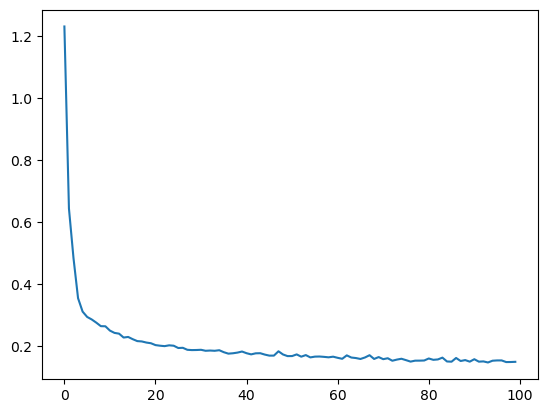

In [46]:
sns.lineplot(x=history.epoch, y=history.history['loss'])

In [47]:
y_pred = model.predict(X_test)
prediction_df = pd.DataFrame(y_pred, columns=target.columns)
prediction_df

19/19 [==============================] - 0s 353us/step


,Consumption: drinking,"Food consumption: plate, dish, bowl"
0,0.007531,0.992469
1,0.001811,0.998189
2,0.826186,0.173814
3,0.000442,0.999558
4,1.000000,0.000000
...,...,...
599,0.532113,0.467887
600,0.000216,0.999784
601,0.000481,0.999519
602,0.656961,0.343039


In [48]:
from sklearn.metrics import confusion_matrix

# convert outputs from two numbers to one using idxmax

true_class = y_test.idxmax(axis='columns')

predicted_class = prediction_df.idxmax(axis='columns')

In [49]:
matrix = confusion_matrix(true_class, predicted_class)

matrix

array([[170,   5],
       [ 17, 412]])

In [50]:
confusion_df = pd.DataFrame(matrix, index=y_test.columns.values, columns=y_test.columns.values)

confusion_df.index.name = 'True label'

confusion_df.columns.name = 'Predicted label'

In [51]:
confusion_df

Predicted label,Consumption: drinking,"Food consumption: plate, dish, bowl"
True label,,
Consumption: drinking,170,5
"Food consumption: plate, dish, bowl",17,412


<Axes: xlabel='Predicted label', ylabel='True label'>

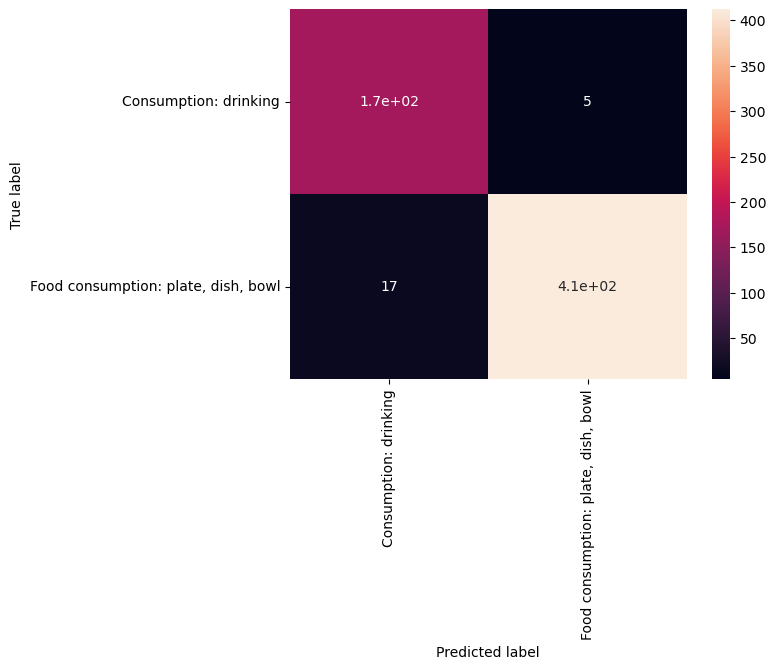

In [52]:
sns.heatmap(confusion_df, annot=True)

In [53]:
y_train_pred = model.predict(X_train)

76/76 [==============================] - 0s 361us/step


In [54]:
train_predicted = pd.DataFrame(y_train_pred, columns=target.columns)

In [55]:
train_predicted_class = train_predicted.idxmax(axis='columns')

In [56]:
train_true_class = y_train.idxmax(axis='columns')

In [57]:
matrix_2 = confusion_matrix(true_class, predicted_class)

matrix_2

array([[170,   5],
       [ 17, 412]])

<Axes: xlabel='Predicted label', ylabel='True label'>

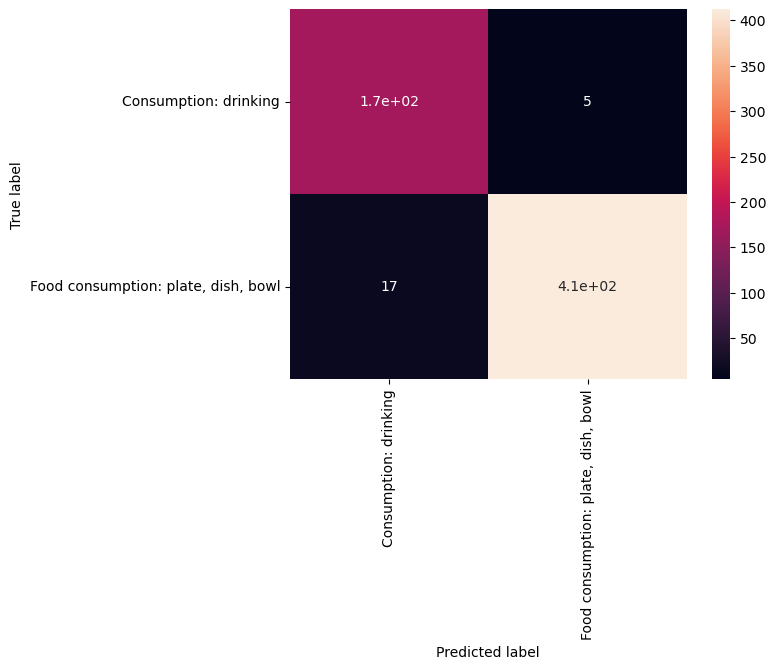

In [58]:
confusion_df = pd.DataFrame(matrix, index=y_test.columns.values, columns=y_test.columns.values)

confusion_df.index.name = 'True label'
confusion_df.columns.name = 'Predicted label'

sns.heatmap(confusion_df, annot=True)

In [59]:
# (10) share model

In [59]:
model.save('ceramics_model')

INFO:tensorflow:Assets written to: ceramics_model/assets


INFO:tensorflow:Assets written to: ceramics_model/assets


In [63]:
pretrained_model = keras.models.load_model('ceramics_model')

y_pretrained_pred = pretrained_model.predict(X_test)
y_pretrained_pred

19/19 [==============================] - 0s 371us/step


array([[7.5306403e-03, 9.9246937e-01],
       [1.8107970e-03, 9.9818915e-01],
       [8.2618630e-01, 1.7381376e-01],
       ...,
       [4.8075072e-04, 9.9951923e-01],
       [6.5696055e-01, 3.4303948e-01],
       [4.3371331e-04, 9.9956626e-01]], dtype=float32)